2023-02-21 <br/>
Bob Ross Paintings <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-02-21/readme.md

Sunburst chart with subplots - Completed 

https://plotly.com/python/sunburst-charts/#sunburst-of-a-rectangular-dataframe-with-discrete-color-argument-in-pxsunburst 

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-21/bob_ross.csv")

In [3]:
df.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [4]:
df.columns

Index(['painting_index', 'img_src', 'painting_title', 'season', 'episode',
       'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso',
       'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna',
       'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear',
       'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue',
       'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre',
       'Alizarin_Crimson'],
      dtype='object')

In [5]:
df_paintings = df[['painting_index', 'img_src', 'painting_title', 'season', 'episode',
       'num_colors', 'youtube_src', 'colors', 'color_hex']]

In [6]:
df_paintings.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '..."
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '..."
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '..."
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']"
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '..."


In [7]:
# Convert string representaion to actual arrays 
from ast import literal_eval
df_paintings['colors'] = df_paintings['colors'].apply(literal_eval)
df_paintings['color_hex'] = df_paintings['color_hex'].apply(literal_eval)

C:\Users\shawn\AppData\Local\Temp\ipykernel_22004\204817402.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shawn\AppData\Local\Temp\ipykernel_22004\204817402.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
df_painting = df_paintings[['season','painting_index','colors', 'color_hex']]

In [9]:
df_split = df_painting.set_index(['season','painting_index']).apply(pd.Series.explode).reset_index()

In [10]:
df_split.colors.unique()

array(['Alizarin Crimson', 'Bright Red', 'Cadmium Yellow',
       'Phthalo Green\r\n', 'Prussian Blue', 'Sap Green',
       'Titanium White', 'Van Dyke Brown', 'Black Gesso', 'Burnt Umber',
       'Indian Yellow', 'Phthalo Blue', 'Yellow Ochre', 'Liquid Black',
       'Midnight Black\r\n\r\n', 'Liquid Clear', 'Dark Sienna',
       'Indian Red'], dtype=object)

In [11]:
#Cleaning up the colour names 
df_split.colors.replace("\r\n","",inplace=True, regex=True)
df_split.colors.unique()

array(['Alizarin Crimson', 'Bright Red', 'Cadmium Yellow',
       'Phthalo Green', 'Prussian Blue', 'Sap Green', 'Titanium White',
       'Van Dyke Brown', 'Black Gesso', 'Burnt Umber', 'Indian Yellow',
       'Phthalo Blue', 'Yellow Ochre', 'Liquid Black', 'Midnight Black',
       'Liquid Clear', 'Dark Sienna', 'Indian Red'], dtype=object)

In [12]:
# Emphasizing the season 
df_split['season'] = 'Season ' + df_split['season'].astype(str)

In [13]:
df_split.head()

,season,painting_index,colors,color_hex
0,Season 1,282,Alizarin Crimson,#4E1500
1,Season 1,282,Bright Red,#DB0000
2,Season 1,282,Cadmium Yellow,#FFEC00
3,Season 1,282,Phthalo Green,#102E3C
4,Season 1,282,Prussian Blue,#021E44


In [14]:
# Mapt each of the colours 
colour_map = df_split[['colors','color_hex']].drop_duplicates().reset_index(drop=True)
colour_map

,colors,color_hex
0,Alizarin Crimson,#4E1500
1,Bright Red,#DB0000
2,Cadmium Yellow,#FFEC00
3,Phthalo Green,#102E3C
4,Prussian Blue,#021E44
5,Sap Green,#0A3410
6,Titanium White,#FFFFFF
7,Van Dyke Brown,#221B15
8,Black Gesso,#000000
9,Burnt Umber,#8A3324


In [15]:
# Convert Corlour mapping to a dictionary
colour_map.set_index('colors', drop=True).to_dict()["color_hex"]
colour_map

,colors,color_hex
0,Alizarin Crimson,#4E1500
1,Bright Red,#DB0000
2,Cadmium Yellow,#FFEC00
3,Phthalo Green,#102E3C
4,Prussian Blue,#021E44
5,Sap Green,#0A3410
6,Titanium White,#FFFFFF
7,Van Dyke Brown,#221B15
8,Black Gesso,#000000
9,Burnt Umber,#8A3324


In [16]:
# Get all the colour groupings by season 

df_group= df_split.groupby(["season","colors","color_hex"]).agg(times_used= ("painting_index", "count")).reset_index()
df_group.head()

,season,colors,color_hex,times_used
0,Season 1,Alizarin Crimson,#4E1500,11
1,Season 1,Black Gesso,#000000,2
2,Season 1,Bright Red,#DB0000,10
3,Season 1,Cadmium Yellow,#FFEC00,10
4,Season 1,Phthalo Green,#102E3C,10


In [17]:
# Taking a subset 
df_season_1 = df_group.loc[df_group.season =="Season 1"]

df_season_1.head()

,season,colors,color_hex,times_used
0,Season 1,Alizarin Crimson,#4E1500,11
1,Season 1,Black Gesso,#000000,2
2,Season 1,Bright Red,#DB0000,10
3,Season 1,Cadmium Yellow,#FFEC00,10
4,Season 1,Phthalo Green,#102E3C,10


In [18]:
# Individual sunburst 

fig = px.sunburst(df_season_1, path=['season',"colors"], values='times_used', color='colors',
                 color_discrete_map= colour_map.set_index('colors').to_dict()["color_hex"])
fig.show()

d:\Users\shawn\Desktop\imp\learning\virtual_env\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

d:\Users\shawn\Desktop\imp\learning\virtual_env\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



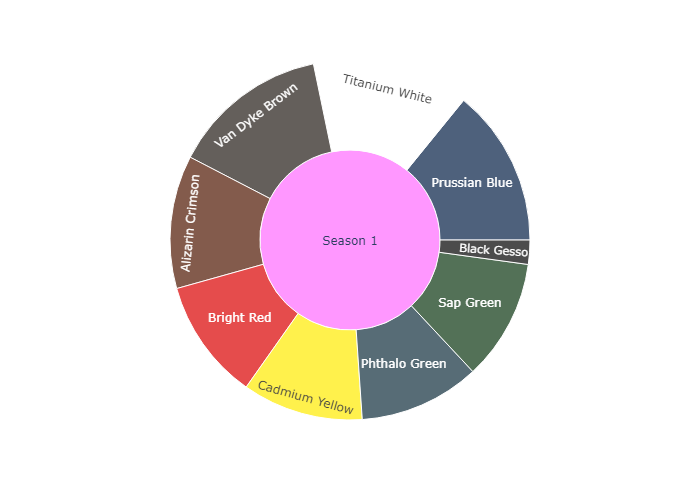

In [19]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [20]:
# Using Figure 
fig = go.Figure()

fig.add_trace(go.Sunburst(
    labels=df_season_1.colors,
    parents=df_season_1.season,
    values = df_season_1.times_used,
    marker=dict(colors=df_season_1.color_hex ), 
    insidetextorientation='radial'
))

fig.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)

fig.show()

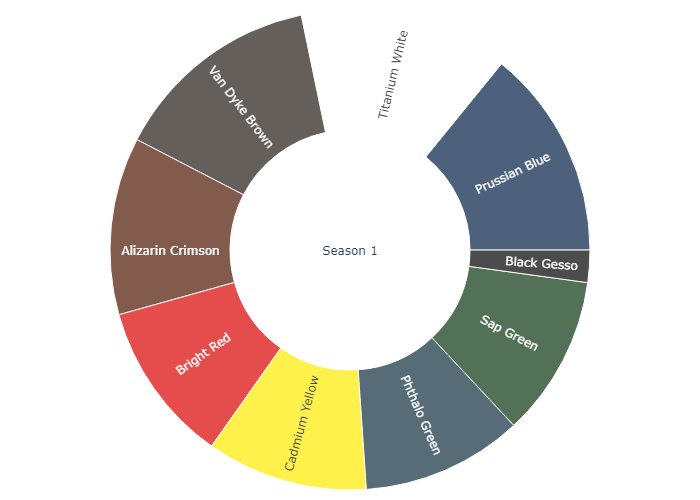

In [21]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [22]:
# Subplots 

from plotly.subplots import make_subplots

# Survival Analysis using Plotly - By Season 
fig= go.Figure()
fig = make_subplots(
    rows=8,
    cols=4,
    #vertical_spacing=0.10,
    subplot_titles=[str(x) for x in df_group.season.unique()].sort(),
    specs=[[{"type": "domain"} for _ in range(4)] for _ in range(8)]
    # y_title= "Survival probability",
    # x_title ="Duration (Days)"
)
showlegend = True
i = 1 
n =df_group.season.nunique()
for rows in range(8):
    for cols in range(4):
        fig.add_trace(go.Sunburst(
            labels=df_group[df_group.season == "Season "+str(i)].colors,
            parents=df_group[df_group.season == "Season "+str(i)].season,
            values = df_group[df_group.season == "Season "+str(i)].times_used,
            marker=dict(colors=df_group[df_group.season == "Season "+str(i)].color_hex ), 
            insidetextorientation='radial'
        ),
        col = cols+1,
        row = rows+1
        )
        i+=1


fig.update_layout(
    title = "Which were the predominat colours in each Season?",
   # margin=dict(r=0, t=10, l=0),
   # font_size=14,
    height= 3000,
    width = 2000,
)


fig.show()

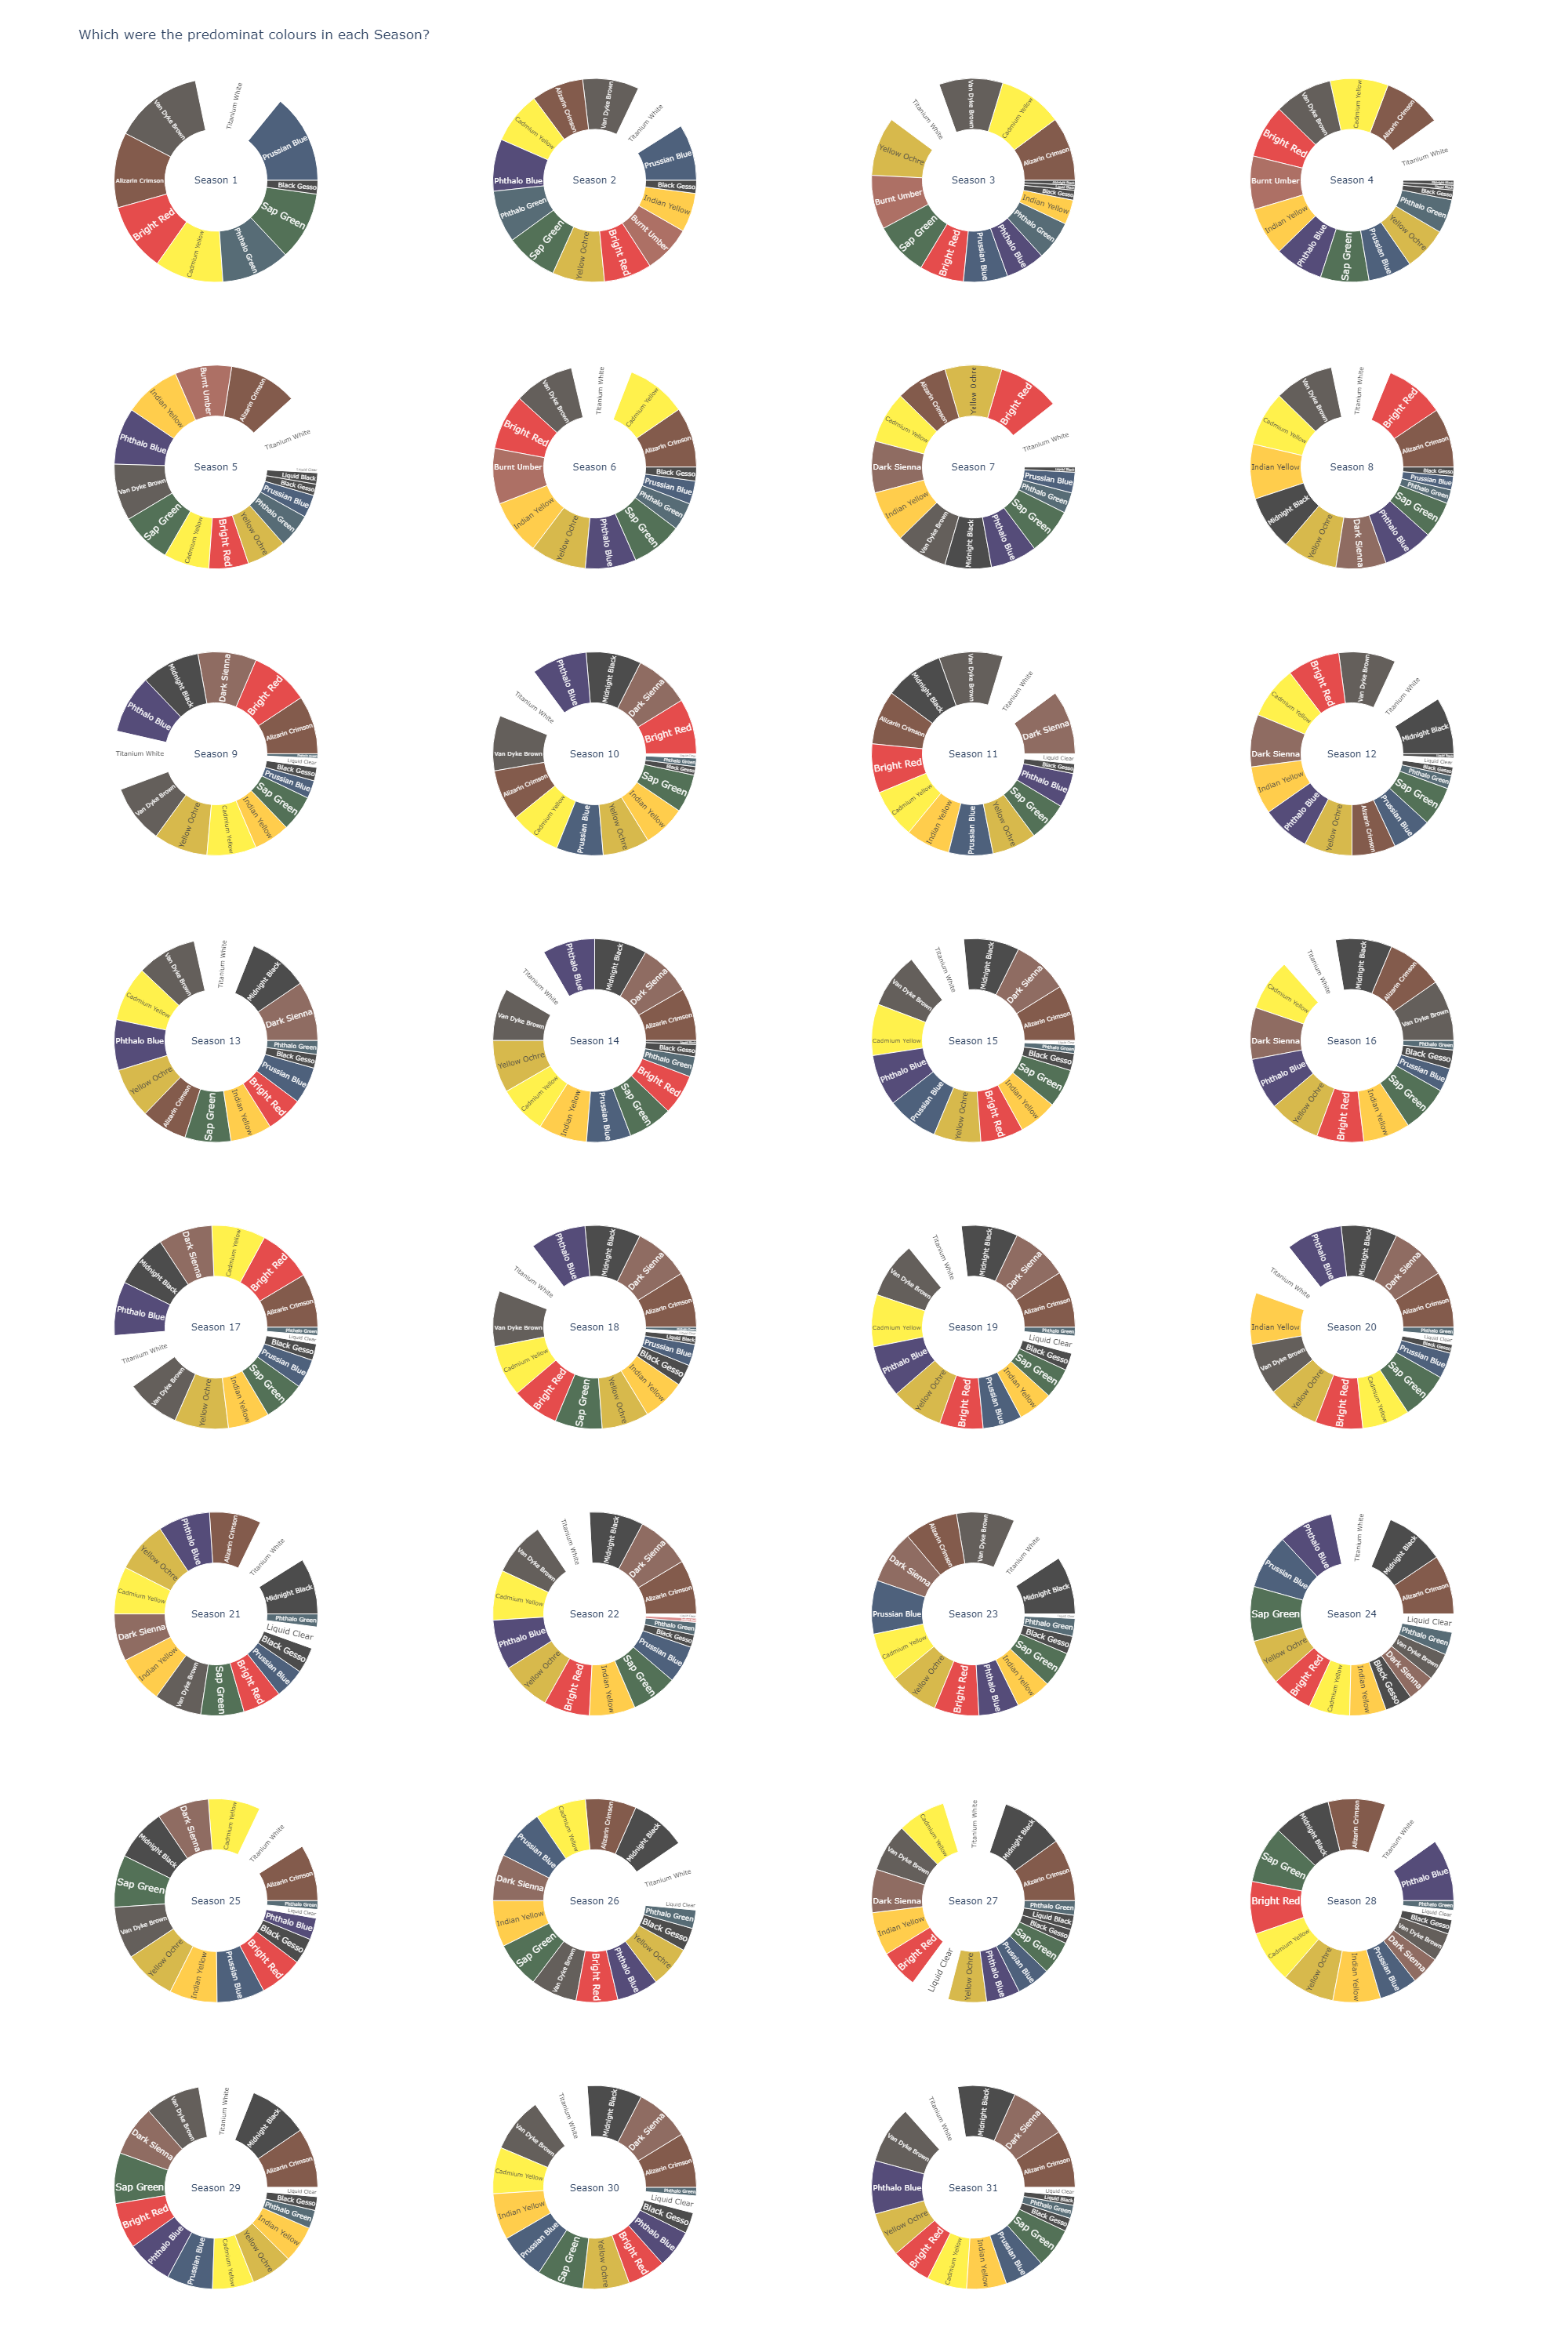

In [23]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)